In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Задача 1 

Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

2.6205388824027653
444.17735732435955
[[444.17735732]
 [  2.62053888]]


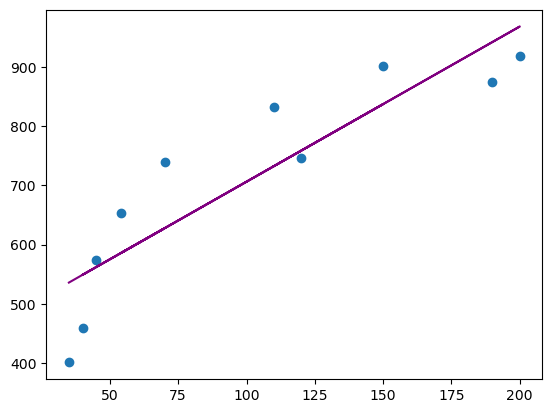

In [12]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = (len(zp) + len(ks))/2
b1 = (n * np.sum(zp * ks) - np.sum(zp) * np.sum(ks))/(n * np.sum(zp**2) - np.sum(zp)**2)
print(b1)
b0 = np.mean(ks) - b1*np.mean(zp)
print(b0)
y_pred = b0 + b1 * zp

x = zp.reshape((10, 1))
y = ks.reshape((10, 1))
X1 = np.hstack([np.ones((10, 1)), x])
B1 = np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T @ y)
print(B1)
plt.scatter(zp,ks)
plt.plot (zp, y_pred, color="purple")
plt.show()

Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
def mse_(B2, y = ks, x = zp, n = n):
    return np.sum((B2 * x - y)**2)/n
alfa = 0.000001
B2 = 0.1
print(mse_(B2, ks, zp, n))
for i in range(1000):
    B2 -= alfa * (2 / n) * np.sum((B2 * zp - ks) * zp)
    if i % 50 == 0:
        print(f'{ i + 1 } итерация: B2 = {B2}')

518336.326
1 итерация: B2 = 0.25952808
51 итерация: B2 = 4.497229618367758
101 итерация: B2 = 5.54537842245223
151 итерация: B2 = 5.804626485478126
201 итерация: B2 = 5.868748638669329
251 итерация: B2 = 5.884608547059329
301 итерация: B2 = 5.888531320728348
351 итерация: B2 = 5.889501575592372
401 итерация: B2 = 5.8897415574471985
451 итерация: B2 = 5.889800914315978
501 итерация: B2 = 5.889815595583751
551 итерация: B2 = 5.889819226833643
601 итерация: B2 = 5.889820124983314
651 итерация: B2 = 5.889820347130743
701 итерация: B2 = 5.889820402076462
751 итерация: B2 = 5.889820415666681
801 итерация: B2 = 5.88982041902807
851 итерация: B2 = 5.889820419859474
901 итерация: B2 = 5.889820420065112
951 итерация: B2 = 5.889820420115975


Коэфициент линейной регрессии после 651 итераций: B1 = 5.889820347130743

### Задача 3 

(Дополнительно) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

 интерсепт: 444.17735732435955
 коэффициент: [2.62053888]
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


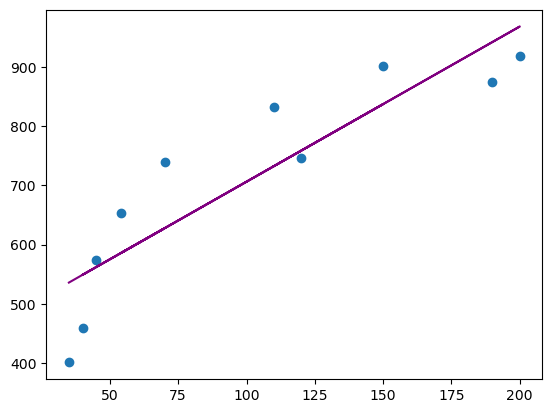

In [14]:
model = LinearRegression()
s = zp.reshape(-1,1)
regres = model.fit(s, ks)
print(f' интерсепт: {regres.intercept_}')
print(f' коэффициент: {regres.coef_}')
y_pred2 = model.predict(s)
print(y_pred2)
plt.scatter(zp,ks)
plt.plot (zp, y_pred2, color="purple")
# plt.scatter(zp,y_pred2, -r)
plt.show()

In [16]:

b0 = 0
b1 = 0

for i in range(4000000):
  y_pred = b0 + b1 * zp
  error = y_pred - ks
  b0 -= alpha * (2 / len(X)) * np.sum(error)
  b1 -= alpha * (2 / len(X)) * np.sum(error * zp)
  if i % 100000 == 0:
    print(f'{i}:a = {b0} b = {b1}')

0:a = 0.014198000000000002 b = 1.6228340000000003
100000:a = 176.75811072035165 b = 4.58886277024886
200000:a = 283.1597026791269 b = 3.8057000105861776
300000:a = 347.22590212172315 b = 3.3341444573948005
400000:a = 385.8012451730586 b = 3.0502128773981068
500000:a = 409.02811213996523 b = 2.8792528673338933
600000:a = 423.01340187233546 b = 2.776314951651871
700000:a = 431.43418153138043 b = 2.7143342903207497
800000:a = 436.5044754918975 b = 2.6770146850656134
900000:a = 439.557385303937 b = 2.6545439190800395
1000000:a = 441.39559397448323 b = 2.641013890546081
1100000:a = 442.50241052804165 b = 2.6328672313601826
1200000:a = 443.1688435086043 b = 2.6279619899762956
1300000:a = 443.57011408606826 b = 2.6250084611142475
1400000:a = 443.8117258925492 b = 2.6232300913958313
1500000:a = 443.9572044506873 b = 2.62215930488817
1600000:a = 444.0447995528712 b = 2.621514566208077
1700000:a = 444.0975420465038 b = 2.6211263581361455
1800000:a = 444.1292991946283 b = 2.6208926114853077
19000